In [277]:
import numpy as np
import matplotlib.pyplot as plt

In [278]:
def GaussianElimination(A, B, pivot = True, showall = False):
    n = A.shape[0]
    A = np.float128(A)
    B = np.float128(B)
    if showall is True:
        print("Start of Forward Elimination:\n")
    for i in range(n-1):
        if pivot is True:
            max_row_index = np.argmax(np.abs(A[i:, i])) + i
            A[[i, max_row_index]] = A[[max_row_index, i]]
            B[[i, max_row_index]] = B[[max_row_index, i]]
        
        for j in range(i+1, n):
            multiplier = A[j, i] / A[i,i]
            subtracted_term = A[i, i:] * multiplier
            A[j, i:] = A[j, i:] - subtracted_term
            subtracted_term = B[i]*multiplier
            B[j] = B[j] - subtracted_term
            if showall is True:
                print(f'Step: {i+1} Substep: {j-i}\nA:\n{A}\nB:\n{B}\n')
    if showall is True:
        print("End of Forward Elimination\n")
    X = np.zeros((n,1))
    for i in range(n-1, -1, -1):
        X[i] = B[i]
        tempA = A[i, i+1:]
        tempX = X[i+1:, 0]
        tempA = tempA.reshape(1, tempA.shape[0])
        tempX = tempX.reshape(tempX.shape[0], 1)
        X[i] = X[i] - np.matmul(tempA, tempX)
        X[i] = X[i] / A[i, i]
    return X

In [279]:
def bisection(low, high, fun, expected_ea, max_iter=150):
    assert fun(low) * fun(high) <= 0,"no single root in this interval"
    assert max_iter > 0, "invalid max_iter"

    prev_midx = None
    for i in range(max_iter):
        midx = (low + high)/2
        if i > 0:
            ea = np.absolute((midx - prev_midx)/midx)*100
            if ea <= expected_ea:
                return midx
        decider = fun(midx)*fun(high)
        if decider < 0:
            low = midx
        elif decider > 0:
            high = midx
        else:
            return midx
        prev_midx = midx
    return prev_midx

In [280]:
def visualize(x, y):
    font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'bold',
    'size': 18,
    }
    plt.figure(figsize=(12, 7))
    plt.plot(x, y, marker='o') 
    plt.legend(["dataset"], loc ="upper right")
    plt.title('y vs x graph', fontdict=font)
    plt.xlabel('x values', fontdict=font)
    plt.ylabel('y values', fontdict=font)
    plt.grid()
    plt.show()

[ 0  5 10 15 20 25 30] [1000  550  316  180   85   56   31]


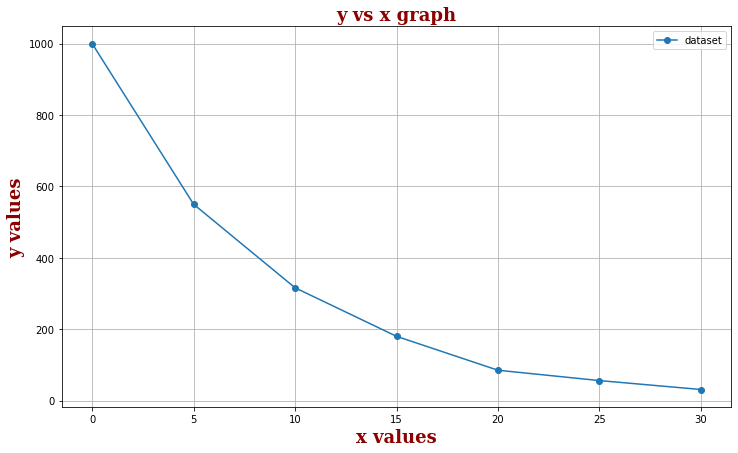

In [281]:
x = np.arange(0, 31, 5)
y = np.array([1000, 550, 316, 180, 85, 56, 31])
print(x, y)
visualize(x, y)

In [282]:
def visualizeModel(x, y, predict_x, predicted_y):
    '''x and y are datasets and predicted_y is model prediction on predict_x values'''
    font = {'family': 'serif',
    'color':  'darkred',
    'weight': 'bold',
    'size': 18,
    }
    plt.figure(figsize=(12, 7))
    plt.plot(x, y, 'or', predict_x, predicted_y, 'o-b') 
    plt.legend(["Data points", "Regressed Model"], loc ="upper right")
    plt.title('Model Prediction Visualization', fontdict=font)
    plt.xlabel('x values', fontdict=font)
    plt.ylabel('y values', fontdict=font)
    plt.grid()
    plt.show()

In [283]:
def linearRegression(x, y):
    '''returns a0 and a1 fitting the linear model y = a0 + a1*x to the given x and y datasets, where x and y are numpy arrays'''
    x = np.float128(x)
    y = np.float128(y)
    n = x.shape[0]
    sx = np.sum(x)
    sy = np.sum(y)
    sxy = np.sum(x*y)
    sxsquared = np.sum(x**2)
    a1 = (n*sxy - sx*sy)/(n*sxsquared - sx**2)
    a0 = sy/n - a1*sx/n
    return a0, a1

In [284]:
def predictLinearRegression(x, y, predict_x):
    n = predict_x.shape[0]
    predicted_y = np.zeros(shape=(n,))
    a0, a1 = linearRegression(x, y)
    for i in range(n):
        predicted_y[i] = a0 + a1 * predict_x[i]
    return predicted_y

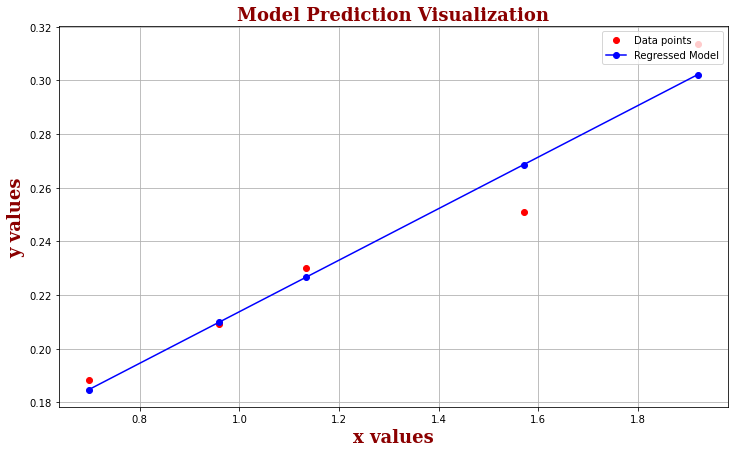

In [285]:
#test linearRegression 
x = np.array([0.698132, 0.959931, 1.134464, 1.570796, 1.919862])
y = np.array([0.188224, 0.209138, 0.230052, 0.250965, 0.313707])
visualizeModel(x, y, x, predictLinearRegression(x, y, x))

In [286]:
def exponentialModel(x, y, byTransformation=True):
    '''returns a and b fitting the exponential model y = a*e^(bx) to the given x and y datasets, where x and y are numpy arrays'''
    x = np.float128(x)
    y = np.float128(y)
    if byTransformation:
        z = np.log(y)
        a0, a1 = linearRegression(x, z)
        a = np.exp(a0)
        b = a1
        return a, b
    else:
        def fun(b):
            s1 = np.sum(y*x*np.exp(b*x))
            s2 = np.sum(y*np.exp(b*x))
            s3 = np.sum(np.exp(2*b*x))
            s4 = np.sum(x*np.exp(2*b*x))
            f = s1 - s2/s3*s4
            return f
        b = bisection(-5, 5, fun, 0.005) #assumed b is between -5 and 5. Change it if necessary.
        a = np.sum(y*np.exp(b*x))/np.sum(np.exp(2*b*x))
        return a, b 


In [287]:
def predictExponentialModel(x, y, predict_x):
    n = predict_x.shape[0]
    predicted_y = np.zeros(shape=(n,))
    a, b = exponentialModel(x, y)
    for i in range(n):
        predicted_y[i] = a*np.exp(b*predict_x[i])
    return predicted_y

(991.70914418620116043, -0.116453773968359305865)
(998.4249914962614727, -0.11688709259033203)


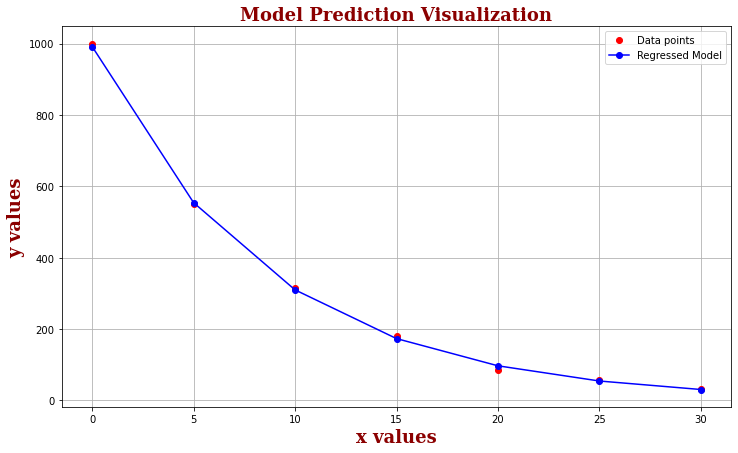

[9.40535214]


In [288]:
#test exponential model
x = np.arange(0, 31, 5)
y = np.array([1000, 550, 316, 180, 85, 56, 31])
print(exponentialModel(x, y))
print(exponentialModel(x, y, False))
visualizeModel(x, y, x, predictExponentialModel(x, y, x))
print(predictExponentialModel(x, y, np.array([40.0])))

In [289]:
def polynomialModel(x, y, order=1):
    '''returns parameters[dim: (order+1)*1] fitting the polynomial model of order 'order' to the datasets x and y,
     where x and y are numpy arrays.
     uses GaussianElimination.'''
    assert order >= 1, 'order value invalid'
    assert x.shape == y.shape, "order of x and y don't match"
    x = np.float128(x)
    y = np.float128(y)
    n = x.shape[0]
    xtp = []
    for i in range(0, 2*order + 1):
        xtp.append(np.sum(x**i))
    A = np.zeros(shape=(order+1, order+1))
    B = np.zeros(shape=(order+1, 1))
    for i in range(order+1):
        A[i] = xtp[i:i+order+1]
        B[i] = np.sum(y*(x**i))
    X = GaussianElimination(A, B)
    return X

In [290]:
def predictPolynomialModel(x, y, predict_x, order=1):
    '''returns the y values for ux as x values fitting the x and y datasets to a polynomial model of given order.
    uses polynomialModel'''
    n = predict_x.shape[0]
    predicted_y = np.zeros(shape=(n,))
    X = polynomialModel(x, y, order)
    for i in range(n):
        for j in range(order+1):
            predicted_y[i] = predicted_y[i] + (predict_x[i]**j)*X[j][0]
    return predicted_y


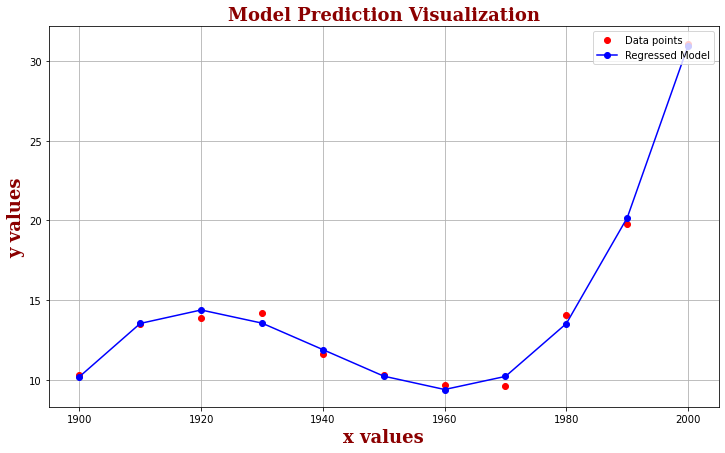

[46.76440528]


In [291]:
#test polynomial model
x = np.array([0.698132, 0.959931, 1.134464, 1.570796, 1.919862])
y = np.array([0.188224, 0.209138, 0.230052, 0.250965, 0.313707])
x = np.arange(1900, 2001, 10)
y = np.array([10.3, 13.5, 13.9, 14.2, 11.6, 10.3, 9.7, 9.6, 14.1, 19.8, 31.1])
visualizeModel(x, y, x, predictPolynomialModel(x, y, x, 3))
print(predictPolynomialModel(x, y, np.array([2010]), 3))

In [292]:
#comparing linear and polynomial model
x = np.array([0.698132, 0.959931, 1.134464, 1.570796, 1.919862])
y = np.array([0.188224, 0.209138, 0.230052, 0.250965, 0.313707])
print(linearRegression(x, y))
print(polynomialModel(x, y))

(0.11766514898834059541, 0.09609143373277995769)
[[0.11766515]
 [0.09609143]]
